0:airplane 1:automobile 2:bird 3:cat 4:deer 5:dog 6:frog 7:horse 8:ship 9:truck

In [1]:
from keras.datasets import cifar10

In [2]:
(train_image, train_label), (test_image, test_label) = cifar10.load_data()

In [3]:
print("train = ", len(train_image))
print("test = ", len(test_image))

train =  50000
test =  10000


In [4]:
train_image.shape

(50000, 32, 32, 3)

In [5]:
import matplotlib.pyplot as plt
def show_cifar10_image(image):
    plt.imshow(image)
    plt.show()

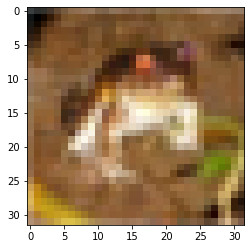

In [6]:
show_cifar10_image(train_image[0])

In [7]:
train_image[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [8]:
train_image[0][0][0]

array([59, 62, 63], dtype=uint8)

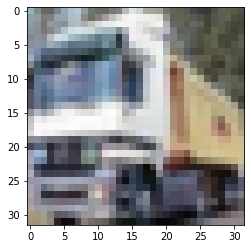

In [9]:
show_cifar10_image(train_image[1])

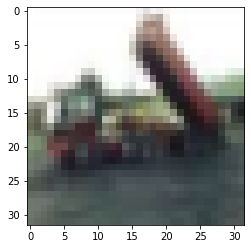

In [10]:
show_cifar10_image(train_image[2])

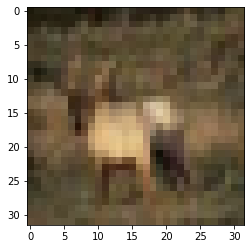

In [11]:
show_cifar10_image(train_image[3])

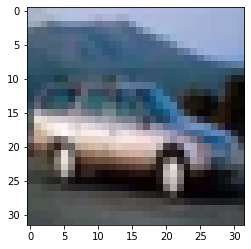

In [12]:
show_cifar10_image(train_image[4])

In [13]:
train_label[0]

array([6], dtype=uint8)

In [14]:
train_label[1]

array([9], dtype=uint8)

In [15]:
train_label[2]

array([9], dtype=uint8)

In [16]:
train_label[3]

array([4], dtype=uint8)

In [17]:
train_label[4]

array([1], dtype=uint8)

In [18]:
train_image_normalize = train_image.reshape(50000, 32, 32, 3).astype(float) / 255
test_image_normalize = test_image.reshape(10000, 32, 32, 3).astype(float) /255

In [19]:
#对标签进行一位有效编码的转换
from keras.utils import np_utils
import numpy as np
train_label_onehotencoding = np_utils.to_categorical(train_label)
test_label_onehotencoding = np_utils.to_categorical(test_label)

In [20]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Conv2D, MaxPooling2D, Flatten

In [21]:
#Sequential:建立一个线性堆叠的模型
model = Sequential()

In [22]:
#filters:产生滤镜的个数
#kernel_size:产生滤镜的尺寸
#padding = 'same': 不改变图片的大小
#input_shape:指定输入图片的尺寸规格
model.add(Conv2D(filters=16, kernel_size=(5,5), padding='same', input_shape=(32,32,3), activation='relu'))

In [23]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [24]:
model.add(Conv2D(filters=32, kernel_size=(5,5), padding='same', activation='relu'))

In [25]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [26]:
model.add(Flatten())

In [27]:
model.add(Dense(units=128, kernel_initializer = 'normal', activation = 'relu'))

In [28]:
model.add(Dropout(0.5))

In [29]:
model.add(Dense(units = 10, kernel_initializer = 'normal', activation = 'softmax'))

In [30]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [31]:
train_history = model.fit(train_image_normalize, train_label_onehotencoding, validation_split=0.2, epochs=30, batch_size=200, verbose=2)

Epoch 1/30
200/200 - 31s - loss: 1.8352 - accuracy: 0.3250 - val_loss: 1.5524 - val_accuracy: 0.4514
Epoch 2/30
200/200 - 30s - loss: 1.5254 - accuracy: 0.4496 - val_loss: 1.4384 - val_accuracy: 0.4893
Epoch 3/30
200/200 - 30s - loss: 1.4213 - accuracy: 0.4886 - val_loss: 1.3143 - val_accuracy: 0.5376
Epoch 4/30
200/200 - 30s - loss: 1.3405 - accuracy: 0.5219 - val_loss: 1.2785 - val_accuracy: 0.5487
Epoch 5/30
200/200 - 30s - loss: 1.2793 - accuracy: 0.5447 - val_loss: 1.1740 - val_accuracy: 0.5866
Epoch 6/30
200/200 - 30s - loss: 1.2191 - accuracy: 0.5664 - val_loss: 1.1392 - val_accuracy: 0.5993
Epoch 7/30
200/200 - 30s - loss: 1.1720 - accuracy: 0.5825 - val_loss: 1.0888 - val_accuracy: 0.6182
Epoch 8/30
200/200 - 30s - loss: 1.1293 - accuracy: 0.6001 - val_loss: 1.0729 - val_accuracy: 0.6193
Epoch 9/30
200/200 - 30s - loss: 1.0941 - accuracy: 0.6131 - val_loss: 1.0440 - val_accuracy: 0.6299
Epoch 10/30
200/200 - 30s - loss: 1.0615 - accuracy: 0.6210 - val_loss: 1.0405 - val_accura

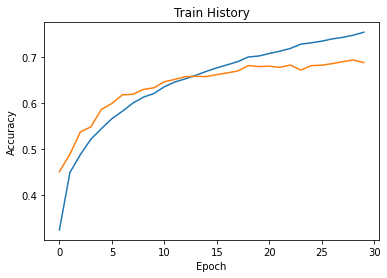

In [32]:
import matplotlib.pyplot as plt
plt.plot(train_history.history['accuracy'])
plt.plot(train_history.history['val_accuracy'])
plt.title("Train History")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.show()

In [33]:
socres = model.evaluate(test_image_normalize, test_label_onehotencoding)
print(socres)

313/313 [==============================] - 2s 7ms/step - loss: 0.9588 - accuracy: 0.6879
[0.9588322043418884, 0.6879000067710876]


In [34]:
model.save("CIFAR10_CNN.h5")